In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

## Check mendelian by own filtering

In [14]:
samples_lst = pd.read_csv('./data/interim/samples.txt', header=None)[0].to_list()
print(samples_lst)

['CAR2463', 'CAR2464', 'CAR2465', 'CAR2466', 'CAR2467', 'CAR2468', 'CAR2469', 'CAR2470', 'CAR2471', 'CAR2472', 'CAR2473', 'CAR2474', 'CAR2475', 'CAR2476', 'CAR2477', 'CAR2478', 'CAR2479', 'CAR2480', 'CAR2481', 'CAR2482', 'CAR2483', 'CAR2484', 'CAR2485', 'CAR2486', 'CAR2487', 'CAR2488', 'CAR2489', 'CAR2490', 'CAR2491', 'CAR2492', 'CAR2493_F', 'CAR2494_М']


In [17]:
# 7min
variants = pd.read_csv('./data/interim/redo/carps32.dnm2.SNPs.table', sep='\t')
variants = variants[(variants.DP > 30) & (variants.CHROM != 'NC_001606.1')]
variants

,CHROM,POS,QUAL,DP,MQ,AN,CAR2463.GT,CAR2463.DP,CAR2463.AD,CAR2463.DNM,...,CAR2492.AD,CAR2492.DNM,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.DNM,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.DNM
0,NC_001606.1,141,8137.29,8863,37,64,T/T,189,"0,189",-inf,...,"0,170",-inf,T/T,187,"0,186",NaN,T/T,191,"0,191",NaN
1,NC_001606.1,169,7843.61,5853,36,64,G/G,134,"0,134",-7.443470e-03,...,"0,138",-0.007443,G/G,131,"1,130",NaN,A/A,146,"146,0",NaN
2,NC_001606.1,192,7843.61,3438,30,64,T/T,68,"0,68",-3.161920e-13,...,"0,95",0.000000,T/T,79,"0,79",NaN,C/C,54,"54,0",NaN
3,NC_001606.1,238,4786.68,1167,17,64,C/C,22,"0,22",-3.360130e+01,...,"0,21",-32.930100,C/C,29,"0,29",NaN,C/C,4,"0,4",NaN
4,NC_001606.1,239,5133.13,1125,17,64,C/C,25,"0,25",-3.563820e+01,...,"0,26",-36.736800,C/C,32,"0,32",NaN,C/C,3,"0,3",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24064953,NC_056621.1,24465946,43.69,195,26,64,C/C,4,"4,0",-2.118380e+01,...,"1,0",-19.111500,C/C,1,"1,0",NaN,C/C,10,"10,0",NaN
24064954,NC_056621.1,24465995,17.28,166,25,60,C/C,3,"3,0",-2.049300e+01,...,"0,0",-18.420700,C/C,1,"1,0",NaN,C/C,10,"10,0",NaN
24064955,NC_056621.1,24466018,1710.70,150,24,60,A/A,4,"0,4",-1.565760e+01,...,"0,0",-18.420700,A/A,1,"1,0",NaN,A/A,10,"0,10",NaN
24064956,NC_056621.1,24466071,701.44,129,20,62,A/A,2,"2,0",-2.555020e+01,...,"1,0",-19.054800,A/A,2,"2,0",NaN,A/G,13,"7,6",NaN


In [33]:
variants10k = pd.read_csv('./data/interim/redo/carps32.dnm2.SNPs.table.head10k', sep='\t')
variants10k = variants10k[(variants10k.DP > 30) & (variants10k.CHROM != 'NC_001606.1')]
variants10k

,CHROM,POS,QUAL,DP,MQ,AN,CAR2463.GT,CAR2463.DP,CAR2463.AD,CAR2463.DNM,...,CAR2492.AD,CAR2492.DNM,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.DNM,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.DNM
187,NC_056572.1,310,785.66,230,45,64,G/G,6,"0,6",-13.5829,...,"9,0",-28.6944,A/G,5,"3,2",NaN,A/A,7,"7,0",NaN
188,NC_056572.1,410,1079.05,255,49,64,G/G,6,"6,0",-inf,...,"5,0",-inf,G/G,6,"6,0",NaN,G/C,12,"6,6",NaN
189,NC_056572.1,419,1229.52,242,48,64,C/C,6,"6,0",-33.9036,...,"3,3",-32.8050,C/T,5,"2,3",NaN,C/C,12,"12,0",NaN
190,NC_056572.1,468,1371.05,161,47,62,T/T,4,"0,4",-25.4469,...,"3,1",-36.7368,A/T,4,"3,1",NaN,A/T,9,"3,6",NaN
191,NC_056572.1,506,39.17,90,39,58,T/T,3,"3,0",-20.4930,...,"2,0",-19.8022,T/T,1,"1,0",NaN,T/T,7,"7,0",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,NC_056572.1,214029,4388.03,347,60,64,A/T,11,"5,6",-inf,...,"3,7",-inf,A/T,7,"4,3",NaN,A/T,8,"4,4",NaN
3255,NC_056572.1,214267,1040.29,222,55,64,T/A,5,"1,4",-20.4906,...,"0,2",-16.3460,T/T,7,"7,0",NaN,T/A,7,"5,2",NaN
3256,NC_056572.1,214275,19.82,220,55,60,T/T,5,"5,0",-21.8904,...,"3,0",-20.5103,T/T,6,"6,0",NaN,T/A,6,"5,1",NaN
3257,NC_056572.1,214281,896.05,201,55,64,C/C,6,"6,0",-36.7368,...,"3,0",-36.7368,C/C,6,"6,0",NaN,C/G,6,"2,4",NaN


Filters:

1. read depth over 12;
2. Allelic balance between 0.25 and 0.75 - the  fraction  of reads supporting the alternative allele out of the reads supporting the   reference  and alternative allele
3. TODO genotype likelihood difference greater than 20 between the highest and    second-highest scoring genotype (GQ).

In [19]:
variants.iloc[:, :15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23107025 entries, 0 to 24064957
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   CHROM        object 
 1   POS          int64  
 2   QUAL         float64
 3   DP           int64  
 4   MQ           int64  
 5   AN           int64  
 6   CAR2463.GT   object 
 7   CAR2463.DP   int64  
 8   CAR2463.AD   object 
 9   CAR2463.DNM  float64
 10  CAR2464.GT   object 
 11  CAR2464.DP   int64  
 12  CAR2464.AD   object 
 13  CAR2464.DNM  float64
 14  CAR2465.GT   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ GB


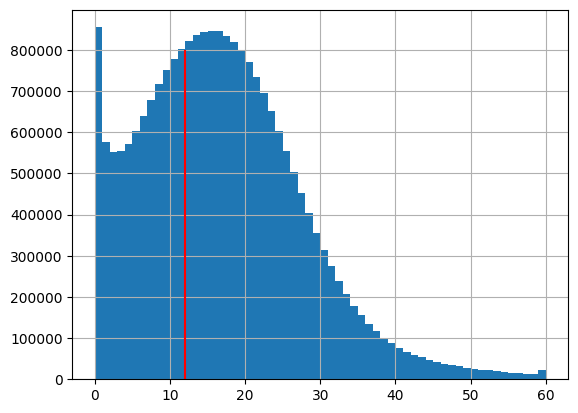

In [28]:
variants['CAR2463.DP'][variants['CAR2463.DP'].between(0, 60)].hist(bins=60)
plt.vlines(12, 0, 800000, 'red')

In [55]:
mother, father = ['CAR2493_F', 'CAR2494_M']

In [59]:
basic_cols = ['CHROM', 'POS', 'QUAL', 'DP', 'MQ', 'AN']

# for proband in samples_lst[:-2]:
proband = samples_lst[0]
fam_cols = [c for c in variants10k.columns if proband in c or mother in c or father in c]
cur_df = variants10k[basic_cols + fam_cols]
cur_df = cur_df[(cur_df[proband+'.DP'] > 12) & (cur_df[mother+'.DP'] > 12) & (cur_df[father+'.DP'] > 12)]
cur_df = cur_df[(cur_df[proband+'.GT'] != cur_df[mother+'.GT']) | (cur_df[proband+'.GT'] != cur_df[father+'.GT'])]
cur_df

,CHROM,POS,QUAL,DP,MQ,AN,CAR2463.GT,CAR2463.DP,CAR2463.AD,CAR2463.DNM,CAR2493_F.GT,CAR2493_F.DP,CAR2493_F.AD,CAR2493_F.DNM,CAR2494_M.GT,CAR2494_M.DP,CAR2494_M.AD,CAR2494_M.DNM
330,NC_056572.1,25480,7378.99,716,60,64,T/T,13,"0,13",-inf,G/T,17,"8,9",NaN,T/T,27,"0,27",NaN
331,NC_056572.1,25482,7545.80,706,60,64,G/G,13,"0,13",-inf,C/G,17,"7,10",NaN,G/G,26,"0,26",NaN
332,NC_056572.1,25608,3317.09,797,60,64,G/G,15,"15,0",-inf,G/G,24,"24,0",NaN,G/C,20,"13,7",NaN
333,NC_056572.1,25615,3277.02,788,60,64,G/G,13,"13,0",-inf,G/G,23,"23,0",NaN,G/T,22,"13,9",NaN
337,NC_056572.1,26129,7112.64,590,60,64,A/A,14,"0,14",-inf,T/A,13,"6,7",NaN,A/A,20,"0,20",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,NC_056572.1,213961,1255.58,525,50,64,A/G,16,"9,5",-inf,A/A,15,"13,0",NaN,A/G,19,"11,5",NaN
3235,NC_056572.1,213964,48.45,524,50,64,G/G,16,"13,2",-36.7368,G/G,15,"12,2",NaN,G/C,18,"15,2",NaN
3236,NC_056572.1,213979,133.51,518,50,64,G/G,16,"14,2",-inf,G/A,16,"13,3",NaN,G/A,17,"14,3",NaN
3237,NC_056572.1,213980,132.58,514,50,64,T/T,16,"14,2",-inf,T/A,15,"12,3",NaN,T/A,15,"12,2",NaN


In [60]:
cur_df.apply([proband+'.GT']

330     T/T
331     G/G
332     G/G
333     G/G
337     A/A
       ... 
3234    A/G
3235    G/G
3236    G/G
3237    T/T
3238    C/C
Name: CAR2463.GT, Length: 1077, dtype: object

## VCFTOOLS --mendelian analysis

In [145]:
# ['MT'] + 
chrom_order = [f'A{i}' for i in range(1, 26)] + [f'B{i}' for i in range(1, 26)]

In [ ]:
chrom_df = pd.read_csv('./data/interim/sequence_report.tsv', sep='\t')
chrom_acc2name = chrom_df.set_index('RefSeq seq accession')['Chromosome name'].to_dict()
chrom_name2size = chrom_df.set_index('Chromosome name')['Seq length'].to_dict()
chrom_df.head(2)

,Assembly Accession,Assembly-unit accession,Chromosome name,GC Count,GC Percent,GenBank seq accession,Molecule type,Ordering,RefSeq seq accession,Role,Seq length,UCSC style name,Unlocalized Count,Sequence name
0,GCF_018340385.1,Primary Assembly,A1,14461706.0,37.0,CM031245.1,Chromosome,NaN,NC_056572.1,assembled-molecule,39504823,NaN,NaN,A1
1,GCF_018340385.1,Primary Assembly,A2,10446150.0,37.0,CM031256.1,Chromosome,NaN,NC_056573.1,assembled-molecule,28433155,NaN,NaN,A2


In [158]:
mendel_errs = pd.read_csv('./data/interim/redo/out.mendel', sep='\t')
mendel_errs['chr_name'] = mendel_errs['CHR'].map(chrom_acc2name)
mendel_errs

,CHR,POS,REF,ALT,FAMILY,CHILD,FATHER,MOTHER,chr_name
0,NC_001606.1,169,A,G,CAR2463_CAR2494_M_CAR2493_F,1/1,0/0,1/1,MT
1,NC_001606.1,169,A,G,CAR2464_CAR2494_M_CAR2493_F,1/1,0/0,1/1,MT
2,NC_001606.1,169,A,G,CAR2465_CAR2494_M_CAR2493_F,1/1,0/0,1/1,MT
3,NC_001606.1,169,A,G,CAR2466_CAR2494_M_CAR2493_F,1/1,0/0,1/1,MT
4,NC_001606.1,169,A,G,CAR2467_CAR2494_M_CAR2493_F,1/1,0/0,1/1,MT
...,...,...,...,...,...,...,...,...,...
25839079,NC_056621.1,24466075,C,T,CAR2476_CAR2494_M_CAR2493_F,1/1,0/1,0/0,B25
25839080,NC_056621.1,24466075,C,T,CAR2478_CAR2494_M_CAR2493_F,1/1,0/1,0/0,B25
25839081,NC_056621.1,24466075,C,T,CAR2481_CAR2494_M_CAR2493_F,1/1,0/1,0/0,B25
25839082,NC_056621.1,24466075,C,T,CAR2490_CAR2494_M_CAR2493_F,1/1,0/1,0/0,B25


In [159]:
mito_mutations = mendel_errs[(mendel_errs.chr_name == 'MT') & \
                             (mendel_errs.CHILD != mendel_errs.MOTHER)]
mito_mutations

,CHR,POS,REF,ALT,FAMILY,CHILD,FATHER,MOTHER,chr_name
90,NC_001606.1,830,G,C,CAR2468_CAR2494_M_CAR2493_F,0/1,1/1,1/1,MT
91,NC_001606.1,830,G,C,CAR2470_CAR2494_M_CAR2493_F,0/1,1/1,1/1,MT
212,NC_001606.1,2734,T,C,CAR2469_CAR2494_M_CAR2493_F,0/1,1/1,1/1,MT
213,NC_001606.1,2734,T,C,CAR2479_CAR2494_M_CAR2493_F,0/1,1/1,1/1,MT
244,NC_001606.1,3003,C,G,CAR2463_CAR2494_M_CAR2493_F,0/1,1/1,1/1,MT
...,...,...,...,...,...,...,...,...,...
980,NC_001606.1,9091,T,A,CAR2482_CAR2494_M_CAR2493_F,0/1,0/0,0/0,MT
981,NC_001606.1,9091,T,A,CAR2485_CAR2494_M_CAR2493_F,0/1,0/0,0/0,MT
982,NC_001606.1,9091,T,A,CAR2486_CAR2494_M_CAR2493_F,0/1,0/0,0/0,MT
983,NC_001606.1,9091,T,A,CAR2487_CAR2494_M_CAR2493_F,0/1,0/0,0/0,MT


In [160]:
mito_mutations.POS.value_counts()

9090    19
8149    16
3003    13
8148    13
9091    11
830      2
2734     2
Name: POS, dtype: int64

In [161]:
mendel_errs_counts = mendel_errs[['chr_name', 'FAMILY']].value_counts().unstack(1)
mendel_errs_counts['chrom_size'] = mendel_errs_counts.index.map(chrom_name2size)
mendel_errs_counts.head(2)

FAMILY,CAR2463_CAR2494_M_CAR2493_F,CAR2464_CAR2494_M_CAR2493_F,CAR2465_CAR2494_M_CAR2493_F,CAR2466_CAR2494_M_CAR2493_F,CAR2467_CAR2494_M_CAR2493_F,CAR2468_CAR2494_M_CAR2493_F,CAR2469_CAR2494_M_CAR2493_F,CAR2470_CAR2494_M_CAR2493_F,CAR2471_CAR2494_M_CAR2493_F,CAR2472_CAR2494_M_CAR2493_F,...,CAR2484_CAR2494_M_CAR2493_F,CAR2485_CAR2494_M_CAR2493_F,CAR2486_CAR2494_M_CAR2493_F,CAR2487_CAR2494_M_CAR2493_F,CAR2488_CAR2494_M_CAR2493_F,CAR2489_CAR2494_M_CAR2493_F,CAR2490_CAR2494_M_CAR2493_F,CAR2491_CAR2494_M_CAR2493_F,CAR2492_CAR2494_M_CAR2493_F,chrom_size
chr_name,,,,,,,,,,,,,,,,,,,,,
A1,21782,24405,22795,22907,21928,22072,21367,30524,59022,25318,...,21221,21029,27581,25065,22860,24768,23295,25109,20787,39504823
A10,13897,6277,8872,13236,8853,5912,8740,8780,62640,7632,...,7349,6477,9143,14127,8604,7290,13015,6949,5940,20928587


In [162]:
for chr in mendel_errs_counts.columns[:-1]:
    mendel_errs_counts[chr.split('_')[0]] = mendel_errs_counts[chr] / mendel_errs_counts['chrom_size']
    del mendel_errs_counts[chr]

mendel_errs_counts = mendel_errs_counts.loc[chrom_order].iloc[:, 1:]

<AxesSubplot:xlabel='FAMILY', ylabel='chr_name'>

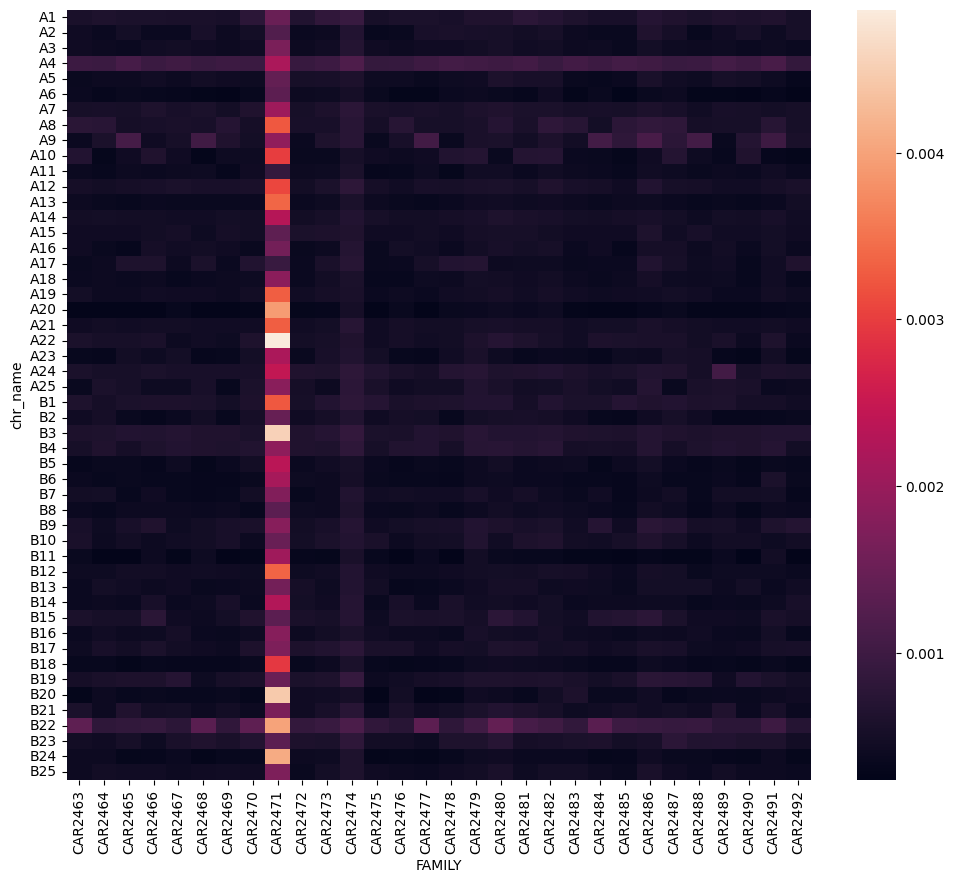

In [163]:
plt.figure(figsize=(12, 10))
sns.heatmap(mendel_errs_counts)

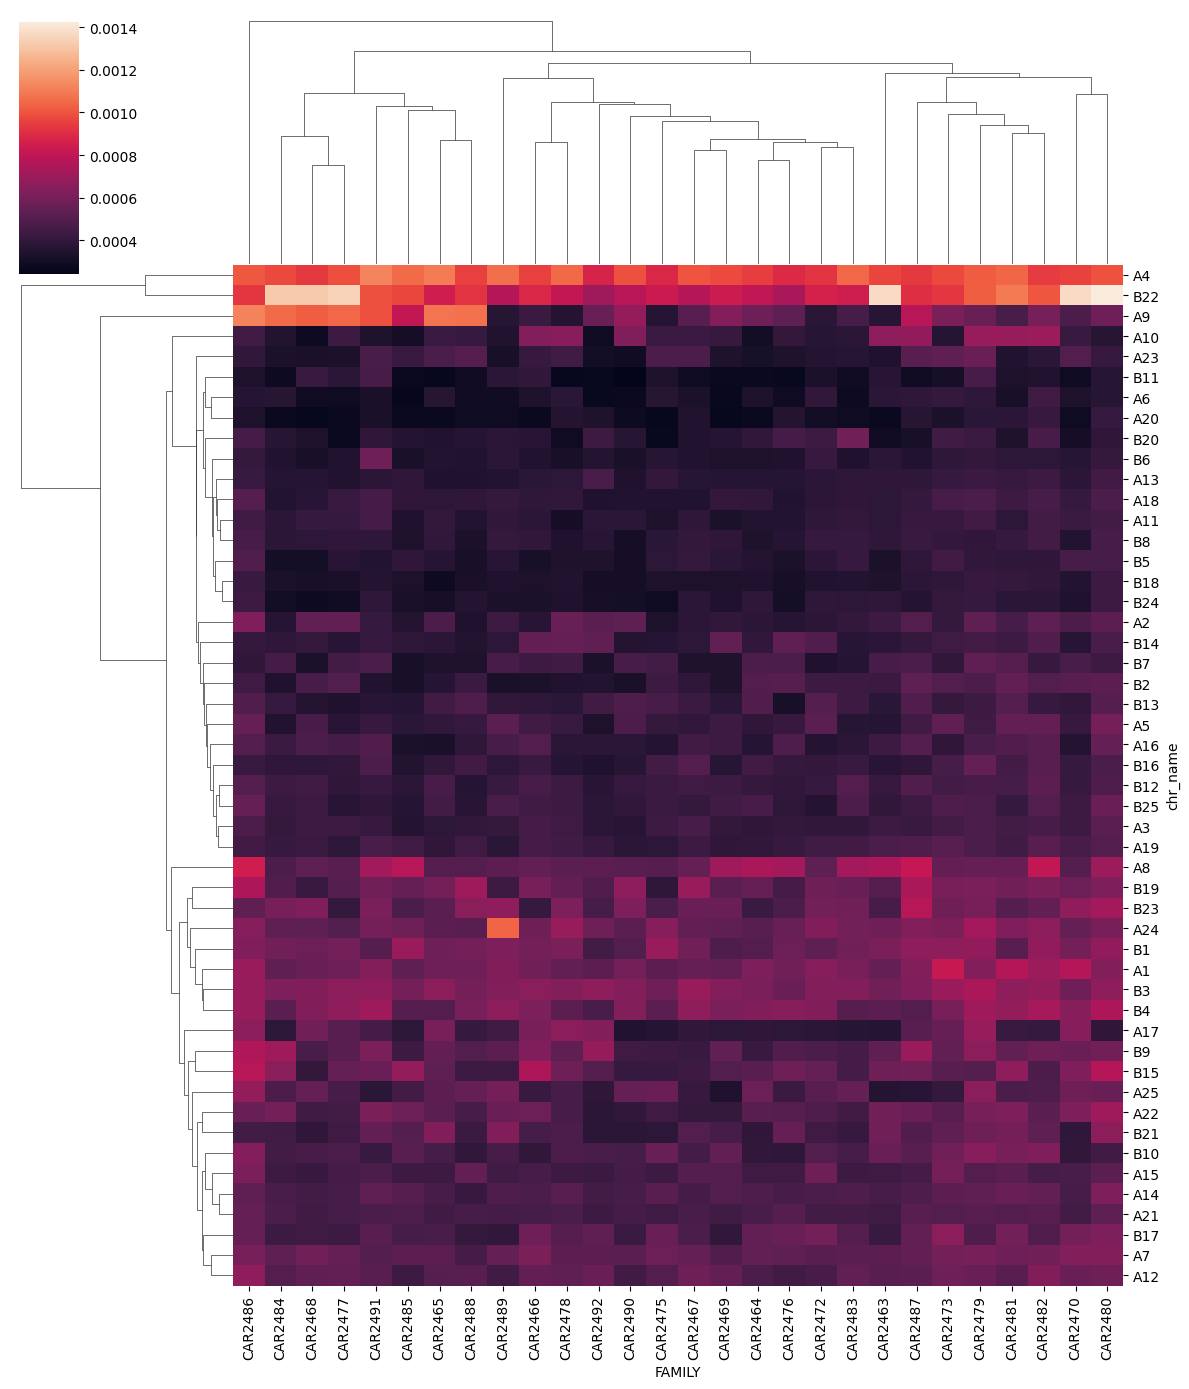

In [164]:
sns.clustermap(mendel_errs_counts.drop(['CAR2471', 'CAR2474'], axis=1), figsize=(12,14))

## Analyse trio stats

In [170]:
labels = ['ctrl'] * 10 + ['nem-shok'] * 10 + ['nem'] * 10

In [179]:
trio_stats = pd.read_csv('./data/interim/redo/trio.stats3.txt', 
                         comment='#', sep='\t', header=None)
trio_stats.columns += 1
trio_stats['group'] = len(trio_stats) // 30 * labels
trio_stats['dnm_mend_ratio'] = (trio_stats[7] - trio_stats[14]) / trio_stats[5]
trio_stats.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,group,dnm_mend_ratio
0,FLT0,CAR2463,CAR2494_M,CAR2493_F,17925866,15089103,383045,303728,4825742,3850370,8104462,7034526,1.15,79144,378944,ctrl,0.016953
1,FLT0,CAR2464,CAR2494_M,CAR2493_F,18184225,15306551,385247,312537,4795339,4019741,8210496,7146254,1.15,72549,381061,ctrl,0.017196


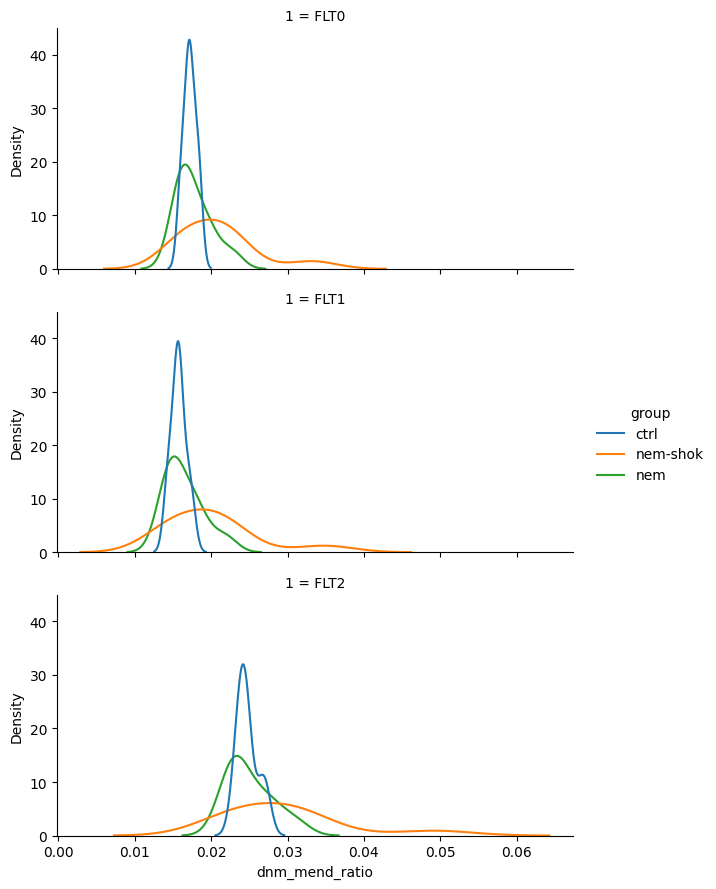

In [180]:
sns.displot(trio_stats[trio_stats.dnm_mend_ratio < 0.05], 
              x='dnm_mend_ratio', hue='group', row=1, 
              kind='kde', height=3, aspect=2,
)

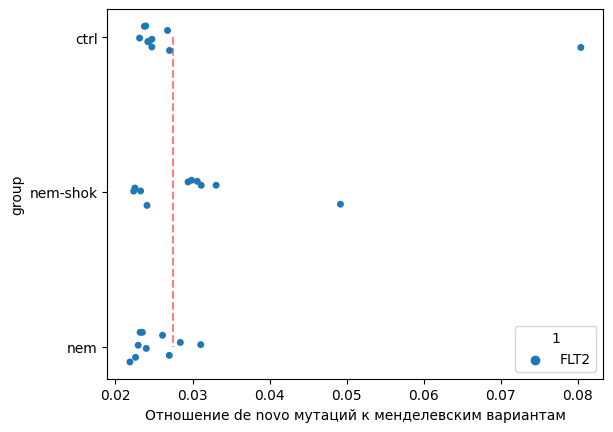

In [189]:
sns.stripplot(trio_stats[(trio_stats.dnm_mend_ratio < 0.5) & (trio_stats[1] == 'FLT2')], 
              x='dnm_mend_ratio', y='group', hue=1)
plt.vlines(0.0275, 0, 2, 'red', 'dashed', '0.02', alpha=0.5,)
plt.xlabel('Отношение de novo мутаций к менделевским вариантам')
plt.savefig('./figures/dnv_mend_ratio.pdf');

In [190]:
#wrong
wrong_trio_stats = pd.read_csv('./data/interim/redo/trio.stats.txt.wrong', 
                         comment='#', sep='\t', header=None)
wrong_trio_stats.columns += 1
# wrong_trio_stats['group'] = len(wrong_trio_stats) // 30 * labels
wrong_trio_stats['dnm_mend_ratio'] = wrong_trio_stats[7] / wrong_trio_stats[5]
wrong_trio_stats.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,dnm_mend_ratio
0,FLT0,CAR2463,CAR2473,CAR2475,17116581,13298996,1796804,1352283,2882519,2289074,7167584,6170581,1.16,444773,1792873,0.104974
1,FLT0,CAR2483,CAR2463,CAR2491,17403687,13729016,1827152,1419836,2926191,2579631,7397675,6373002,1.16,407108,1820947,0.104986


(0.01, 0.16)

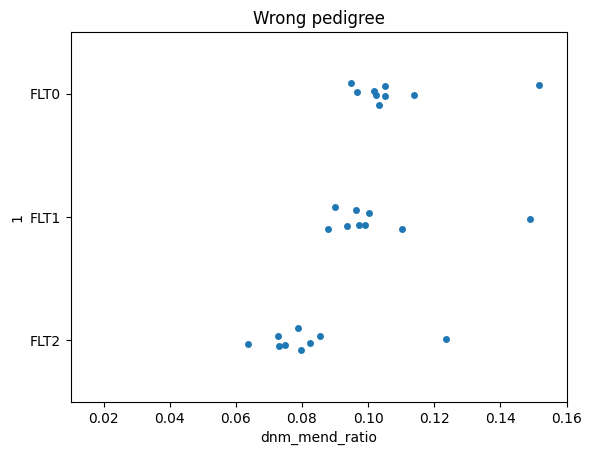

In [191]:
sns.stripplot(wrong_trio_stats, x='dnm_mend_ratio', y=1).set_title('Wrong pedigree');
plt.xlim(0.01, 0.16)

## Check quality on redo v2

In [17]:
df = pd.read_csv('./data/interim/redo/carps32.SNPs.v3.table', sep='\t')
df

,CHROM,POS,QUAL,DP,MQ,AC,AN,CAR2463.GT,CAR2463.DP,CAR2464.GT,...,CAR2490.GT,CAR2490.DP,CAR2491.GT,CAR2491.DP,CAR2492.GT,CAR2492.DP,CAR2493_F.GT,CAR2493_F.DP,CAR2494_?.GT,CAR2494_?.DP
0,NC_001606.1,141,8137.29,8863,37,64,64,T/T,189,T/T,...,T/T,188,T/T,240,T/T,170,T/T,187,T/T,191
1,NC_001606.1,169,7843.61,5853,36,62,64,G/G,134,G/G,...,G/G,139,G/G,99,G/G,138,G/G,131,A/A,146
2,NC_001606.1,192,7843.61,3438,30,62,64,T/T,68,T/T,...,T/T,82,T/T,82,T/T,95,T/T,79,C/C,54
3,NC_001606.1,401,47.56,4,30,"7,1",8,./.,0,./.,...,G/G,1,./.,0,./.,0,./.,0,./.,0
4,NC_001606.1,775,8140.28,7958,44,64,64,A/A,236,A/A,...,A/A,240,A/A,253,A/A,232,A/A,188,A/A,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21251938,NC_056621.1,24458053,2562.64,356,41,30,64,G/T,13,G/T,...,G/T,7,G/T,9,G/T,6,G/T,6,G/T,14
21251939,NC_056621.1,24463260,923.75,60,39,38,44,./.,0,./.,...,./.,0,./.,0,./.,0,A/A,3,A/A,1
21251940,NC_056621.1,24465661,1047.67,287,35,18,64,T/G,8,T/T,...,T/T,7,T/T,5,T/G,8,T/T,12,G/G,7
21251941,NC_056621.1,24465729,3209.37,383,37,36,64,T/A,6,T/A,...,T/A,10,T/T,6,A/A,9,T/A,12,T/A,11


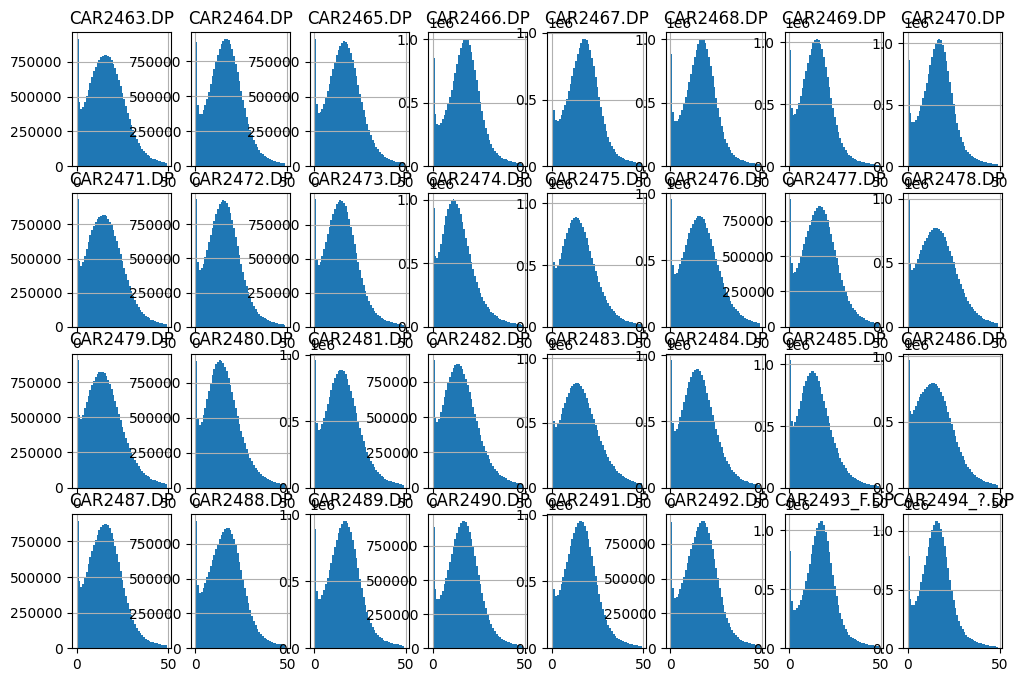

In [30]:
plt.figure(figsize=(12, 8))
for i,s in enumerate([x for x in df.columns if '.DP' in x], 1):
    plt.subplot(4, 8, i)
    df[s][df[s]<50].hist(bins=50)
    plt.title(s)

<AxesSubplot:>

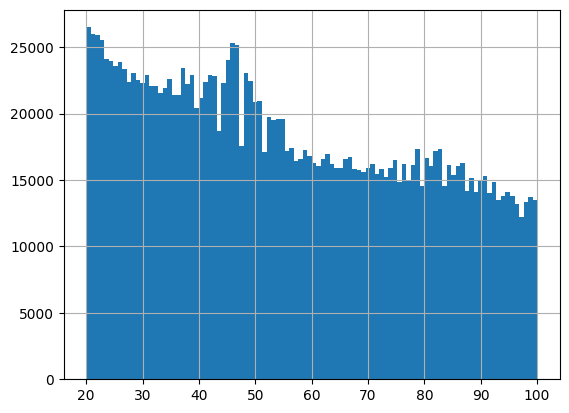

In [18]:
df.QUAL[df.QUAL < 100].hist(bins=100)

In [13]:
df[df.QUAL > 100].AN.value_counts()

64    17525464
62      647722
60      295724
58      197418
56      156560
54      132269
52      126453
50      109820
48       95533
46       86214
44       79164
42       72800
40       70489
38       65313
32       61997
36       57442
34       57158
30       56113
26       54215
28       52831
24       51147
12       47709
10       47218
22       46917
14       46006
16       45644
20       45589
18       45020
8        44550
6        13732
2        13453
4         2772
Name: AN, dtype: int64

## check quality of reads

In [2]:
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Number of high-quality bases">

qual = pd.read_csv('./data/interim/pos_qual_dp.txt', sep='\t', 
    header=None, names=['pos', 'qual', 'dp'])
qual

,pos,qual,dp
0,186,347.9240,18
1,264,742.6710,164
2,310,785.5400,235
3,410,1072.7600,258
4,419,1267.5300,245
...,...,...,...
28822041,24466013,29.4556,154
28822042,24466018,1710.7000,150
28822043,24466071,701.4380,129
28822044,24466075,700.1770,125


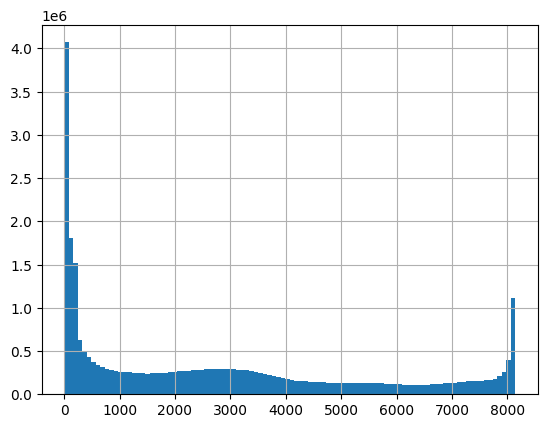

In [4]:
qual.qual.hist(bins=100);

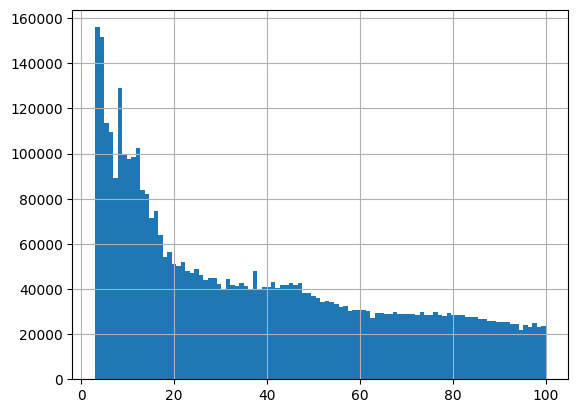

In [3]:
qual.qual[qual.qual < 100].hist(bins=100);

In [4]:
qual.qual[qual.qual < 30].shape

(2143177,)

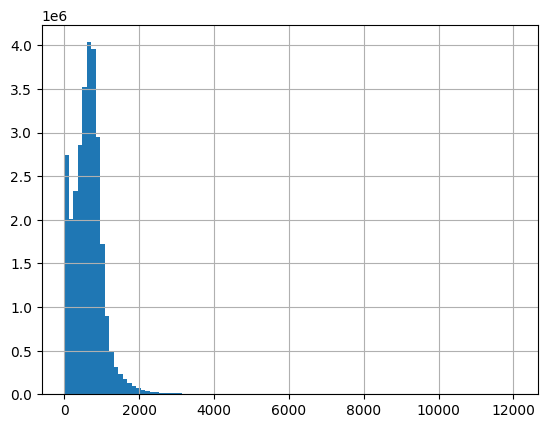

In [5]:
qual.dp.hist(bins=100);

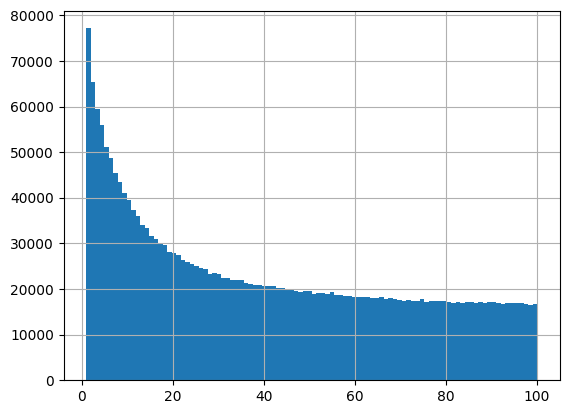

In [6]:
qual.dp[qual.dp.between(1, 100)].hist(bins=100);

## Drop useless columns

In [2]:
cols = 'CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	CAR2493_F	CAR2494_М	CAR2463	CAR2464	CAR2465	CAR2466	CAR2467	CAR2468	CAR2469	CAR2470	CAR2471	CAR2472	CAR2473	CAR2474	CAR2475	CAR2476	CAR2477	CAR2478	CAR2479	CAR2480	CAR2481	CAR2482	CAR2483	CAR2484	CAR2485	CAR2486	CAR2487	CAR2488	CAR2489	CAR2490	CAR2491	CAR2492'.split()
df = pd.read_csv('./data/interim/CARP_KANT.vcf', sep='\t', 
    comment='#', header=None, names=cols) # 8min
df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CAR2493_F,...,CAR2483,CAR2484,CAR2485,CAR2486,CAR2487,CAR2488,CAR2489,CAR2490,CAR2491,CAR2492
0,NC_056572.1,186,.,C,T,347.924,.,DP=18;VDB=2.41924e-09;SGB=-1.31291;RPBZ=-0.848...,GT:PL:DP,"1/1:9,3,0:1",...,"./.:0,0,0:0","1/1:45,6,0:2","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","1/1:33,3,0:1","1/1:34,3,0:1"
1,NC_056572.1,264,.,atttttttt,attttttt,742.671,.,INDEL;IDV=12;IMF=1;DP=164;VDB=4.00419e-13;SGB=...,GT:PL:DP,"0/1:21,0,57:3",...,"1/1:55,6,0:2","0/1:24,0,27:2","0/1:24,0,30:2","0/0:0,6,66:2","1/1:47,6,0:2","0/1:30,3,0:1","0/1:21,0,57:3","0/1:56,0,104:7","0/0:0,12,108:4","0/0:0,21,146:7"
2,NC_056572.1,310,.,A,G,785.540,.,DP=235;VDB=0.108634;SGB=-1.65358;RPBZ=-0.77472...,GT:PL:DP,"0/1:52,0,111:5",...,"0/0:0,6,64:2","0/0:0,9,91:3","0/0:0,9,86:3","0/0:0,12,168:4","0/1:86,0,65:4","0/1:27,0,30:2","0/1:27,0,79:4","0/0:0,24,195:8","0/0:0,18,167:6","0/0:0,27,172:9"
3,NC_056572.1,410,.,G,C,1072.760,.,DP=258;VDB=0.440706;SGB=-13.0246;RPBZ=-0.60076...,GT:PL:DP,"0/0:0,18,144:6",...,"0/1:64,0,57:4","0/1:24,0,80:3","0/1:53,0,30:5","0/0:0,24,223:8","0/1:166,0,18:6","0/1:36,3,0:1","0/0:0,15,170:5","0/1:78,0,107:7","0/1:18,0,131:6","0/0:0,15,132:5"
4,NC_056572.1,419,.,C,T,1267.530,.,DP=245;VDB=0.134293;SGB=-9.73095;RPBZ=0.732702...,GT:PL:DP,"0/1:80,0,49:5",...,"0/0:0,9,118:3","0/1:80,0,28:3","0/1:31,0,17:4","0/1:112,0,118:9","0/0:0,15,192:5","0/0:0,6,64:2","0/0:0,15,169:5","0/1:99,0,77:7","0/1:129,0,20:6","0/1:52,0,76:6"


In [8]:
df['ID'].value_counts()

.    28822046
Name: ID, dtype: int64

In [9]:
df['FILTER'].value_counts()

.    28822046
Name: FILTER, dtype: int64

In [3]:
car_cols = [x for x in df.columns if 'CAR' in x]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28822046 entries, 0 to 28822045
Data columns (total 41 columns):
 #   Column     Dtype  
---  ------     -----  
 0   CHROM      object 
 1   POS        int64  
 2   ID         object 
 3   REF        object 
 4   ALT        object 
 5   QUAL       float64
 6   FILTER     object 
 7   INFO       object 
 8   FORMAT     object 
 9   CAR2493_F  object 
 10  CAR2494_М  object 
 11  CAR2463    object 
 12  CAR2464    object 
 13  CAR2465    object 
 14  CAR2466    object 
 15  CAR2467    object 
 16  CAR2468    object 
 17  CAR2469    object 
 18  CAR2470    object 
 19  CAR2471    object 
 20  CAR2472    object 
 21  CAR2473    object 
 22  CAR2474    object 
 23  CAR2475    object 
 24  CAR2476    object 
 25  CAR2477    object 
 26  CAR2478    object 
 27  CAR2479    object 
 28  CAR2480    object 
 29  CAR2481    object 
 30  CAR2482    object 
 31  CAR2483    object 
 32  CAR2484    object 
 33  CAR2485    object 
 34  CAR2486    objec

In [8]:
# test_df = pd.read_csv('./data/interim/header2.vcf', sep='\t', comment='#')

In [ ]:
df['is_indel'] = df['INFO'].str.contains('INDEL')

In [5]:
for c in car_cols:
    df[c+'_GT'] = df[c].str.slice(0, 3)

In [6]:
df['CAR2477_GT'].value_counts()

0/0    10296622
0/1     9582222
1/1     6039931
./.     2643140
1/2      171278
0/2       39824
1/3       22933
2/2       17800
2/3        7369
3/3         927
Name: CAR2477_GT, dtype: int64

In [7]:
df[df['CAR2477_GT'] == '1/2']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CAR2493_F,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
281,NC_056572.1,30401,.,caaaaa,"cAAaaaaa,cAAAaaaaa",7439.940,.,INDEL;IDV=36;IMF=0.9;DP=963;VDB=0.00572762;SGB...,GT:PL:DP,"1/1:218,21,0,218,21,218:7",...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/2,1/1
767,NC_056572.1,56024,.,taaaaaaaaaaaa,"tAaaaaaaaaaaaa,tAAaaaaaaaaaaaa",4544.460,.,INDEL;IDV=23;IMF=0.766667;DP=664;VDB=5.73186e-...,GT:PL:DP,"1/2:150,54,42,103,0,100:5",...,1/2,1/1,1/2,1/1,1/1,1/1,1/1,1/1,1/2,1/1
864,NC_056572.1,62405,.,cttttttttttttttttttttttt,"ctttttttttttttttt,cTTttttttttttttttttttttttt",3369.350,.,INDEL;IDV=25;IMF=0.833333;DP=747;VDB=1.07828e-...,GT:PL:DP,"1/1:255,27,0,255,27,255:9",...,1/1,./.,./.,1/2,1/1,1/1,1/2,1/2,./.,./.
1017,NC_056572.1,68820,.,aggtg,"ag,agtg",5498.470,.,INDEL;IDV=18;IMF=0.692308;DP=479;VDB=0.0011212...,GT:PL:DP,"1/2:135,68,69,66,0,67:7",...,1/2,1/2,1/2,1/2,1/1,1/2,1/2,2/2,1/2,1/2
1767,NC_056572.1,112164,.,tggggggggg,"tGGGGggggggggg,tGGGggggggggg,tGggggggggg",2076.390,.,INDEL;IDV=13;IMF=1;DP=233;VDB=3.10823e-30;SGB=...,GT:PL:DP,"./.:0,0,0,0,0,0,0,0,0,0:0",...,1/1,1/1,1/1,1/2,./.,1/3,./.,2/3,1/2,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28821304,NC_056621.1,24389439,.,A,"C,T",4681.870,.,DP=1111;VDB=0.24544;SGB=-44.7611;RPBZ=-5.35576...,GT:PL:DP,"1/1:237,20,0,249,78,255:30",...,1/2,0/1,1/1,1/1,0/1,0/1,1/2,0/1,1/2,0/1
28821408,NC_056621.1,24397975,.,taaaaaaaaaaaaaaaaaa,"taaaaaaaaaaaaaaaa,taaaaaaaaaaaaaaa,taaaaaaaaaa...",7071.840,.,INDEL;IDV=33;IMF=0.825;DP=563;VDB=0.0850723;SG...,GT:PL:DP,"1/1:255,40,0,255,57,255,255,57,255,255:20",...,1/2,1/3,1/3,1/1,2/2,1/2,1/3,1/3,1/3,2/2
28821455,NC_056621.1,24405041,.,taaaaaaaaaaaaaaaaa,"tAAaaaaaaaaaaaaaaaaa,tAAAAaaaaaaaaaaaaaaaaa",5570.240,.,INDEL;IDV=26;IMF=0.787879;DP=646;VDB=0.0066792...,GT:PL:DP,"1/1:223,24,0,223,24,223:8",...,./.,1/1,./.,1/2,2/2,2/2,1/1,1/1,1/1,1/2
28821468,NC_056621.1,24408424,.,atttttttttttttttttttttt,"atttttttttttttttttttt,attttttttttttttttttt",3248.880,.,INDEL;IDV=22;IMF=0.758621;DP=490;VDB=0.0023395...,GT:PL:DP,"1/1:40,3,0,40,3,40:1",...,1/1,./.,./.,1/2,1/2,1/2,1/1,./.,1/1,1/2


In [11]:
cold_to_del = car_cols + ['FILTER', 'ID', 'INFO', 'FORMAT']
df_flt = df.drop(cold_to_del, axis=1)

In [15]:
df_flt.to_parquet('./data/interim/CARP_KANT.parquet')

## Main

In [8]:
# Calc the ident to parents
import numpy as np
import pandas as pd

d = pd.DataFrame({
    'mother': ['1/1', '0/1'],
    'father': ['0/1', '0/1'],
    'child': ['1/2', '0/2'],
})
d['mother'] = d['mother'].str.split('/').apply(set)
d['father'] = d['father'].str.split('/').apply(set)
d['child']  = d['child'].str.split('/').apply(set)
d
d.apply(lambda x: [len(x.child.intersection(x.mother)), 
                   len(x.child.intersection(x.father)),
                   len(x.child.difference(x.father.union(x.mother)))], axis=1)

0    [1, 1, 1]
1    [1, 1, 1]
dtype: object

In [2]:
df = pd.read_parquet('./data/interim/CARP_KANT.parquet')
df

,CHROM,POS,REF,ALT,QUAL,is_indel,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.9240,False,1/1,./.,./.,1/1,...,./.,1/1,./.,./.,./.,./.,./.,./.,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.6710,True,0/1,0/1,1/1,0/1,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.5400,False,0/1,0/0,1/1,0/1,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.7600,False,0/0,0/1,0/0,0/0,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.5300,False,0/1,0/0,0/0,0/0,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28822041,NC_056621.1,24466013,taaaa,tAaaaa,29.4556,True,0/0,./.,./.,./.,...,./.,./.,./.,./.,./.,./.,0/0,./.,./.,./.
28822042,NC_056621.1,24466018,C,A,1710.7000,False,1/1,1/1,1/1,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,0/1,1/1,1/1,./.
28822043,NC_056621.1,24466071,A,G,701.4380,False,0/0,0/1,0/0,1/1,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,0/1,0/0
28822044,NC_056621.1,24466075,C,T,700.1770,False,0/0,0/1,0/0,1/1,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,1/1,0/0


In [3]:
ident = pd.read_csv('./data/interim/ident.txt', sep='\t')
ident

,sample,mother,father,diff
0,CAR2464,1,-1,-1
1,CAR2465,1,-1,-1
2,CAR2466,1,-1,-1
3,CAR2467,1,-1,-1
4,CAR2470,1,-1,-1
...,...,...,...,...
782988390,CAR2484,1,1,1
782988391,CAR2487,1,1,0
782988392,CAR2488,1,1,0
782988393,CAR2489,1,1,1


In [10]:
ident_flt = ident[(ident == -1).sum(axis=1) == 0]
ident_flt['mother'] = ident_flt['mother'].astype(np.int8)
ident_flt['father'] = ident_flt['father'].astype(np.int8)
ident_flt['diff'] = ident_flt['diff'].astype(np.int8)
ident_flt.to_parquet('./data/interim/ident.parquet')
ident_flt.shape

/tmp/ipykernel_966630/1901051885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ident_flt['mother'] = ident_flt['mother'].astype(np.int8)
/tmp/ipykernel_966630/1901051885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ident_flt['father'] = ident_flt['father'].astype(np.int8)
/tmp/ipykernel_966630/1901051885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

(740499391, 4)

In [2]:
ident_flt = pd.read_parquet('./data/interim/ident.parquet')
ident_flt

,sample,mother,father,diff
15,CAR2463,1,1,0
16,CAR2464,2,2,0
17,CAR2465,1,1,0
18,CAR2466,1,1,0
19,CAR2467,1,1,0
...,...,...,...,...
782988390,CAR2484,1,1,1
782988391,CAR2487,1,1,0
782988392,CAR2488,1,1,0
782988393,CAR2489,1,1,1


In [3]:
one = ident_flt[ident_flt['sample'] == 'CAR2463']
one

,sample,mother,father,diff
15,CAR2463,1,1,0
45,CAR2463,1,0,0
75,CAR2463,1,1,0
105,CAR2463,1,1,0
135,CAR2463,1,1,0
...,...,...,...,...
782988255,CAR2463,1,1,0
782988288,CAR2463,1,1,0
782988316,CAR2463,1,1,0
782988345,CAR2463,1,1,0


In [4]:
one['diff'].value_counts()

0    24063245
1      626704
2        1144
Name: diff, dtype: int64

In [20]:
one.apply(lambda x: (x.mother, x.father, x['diff']), axis=1).value_counts()

(1, 1, 0)       16099433
(1, 2, 0)        2691273
(2, 2, 0)        2615574
(2, 1, 0)        2235213
(1, 1, 1)         590356
(1, -1, -1)       541368
(-1, 1, -1)       514580
(-1, -1, -1)      293297
(1, 0, 0)         214795
(0, 1, 0)         202724
(-1, 2, -1)        35618
(2, -1, -1)        33460
(0, 0, 1)          25981
(0, -1, -1)        13178
(-1, 0, -1)        13061
(0, 1, 1)           5238
(1, 0, 1)           5129
(0, 2, 0)           2157
(2, 0, 0)           2076
(0, 0, 2)           1144
dtype: int64

In [ ]:
counts = ident_flt.value_counts()
counts.to_csv('./data/interim/indent_flt_counts.csv')
counts

sample   mother  father  diff
CAR2472  1       1       0       16433680
CAR2485  1       1       0       16350806
CAR2478  1       1       0       16317478
CAR2475  1       1       0       16224300
CAR2492  1       1       0       16196679
                                   ...   
CAR2483  0       0       2           1115
CAR2488  0       0       2           1091
CAR2489  0       0       2           1074
CAR2464  0       0       2           1065
CAR2478  0       0       2           1064
Length: 390, dtype: int64

In [17]:
counts.loc['CAR2492']

mother  father  diff
1       1       0       16196679
2       2       0        2643056
1       2       0        2617670
2       1       0        2290406
1       1       1         557650
        0       0         219830
0       1       0         180733
        0       1          25413
1       0       1           5503
0       1       1           5164
2       0       0           2319
0       2       0           2061
        0       2           1179
dtype: int64

In [42]:
df_counts = counts.rename('n').reset_index()
df_counts['gt'] = df_counts['mother'].astype(str) + df_counts['father'].astype(str) + df_counts['diff'].astype(str)
df_counts = df_counts.pivot('gt', 'sample', 'n')
df_count = df_counts / df_counts.sum()
df_count

sample,CAR2463,CAR2464,CAR2465,CAR2466,CAR2467,CAR2468,CAR2469,CAR2470,CAR2471,CAR2472,...,CAR2483,CAR2484,CAR2485,CAR2486,CAR2487,CAR2488,CAR2489,CAR2490,CAR2491,CAR2492
gt,,,,,,,,,,,,,,,,,,,,,
001,0.001052,0.000927,0.001118,0.001083,0.001054,0.001092,0.001042,0.001091,0.008785,0.000938,...,0.000938,0.001109,0.001044,0.001076,0.001054,0.001000,0.000948,0.000966,0.000958,0.001027
002,0.000046,0.000043,0.000051,0.000047,0.000047,0.000048,0.000054,0.000049,0.000133,0.000047,...,0.000045,0.000053,0.000053,0.000052,0.000053,0.000044,0.000043,0.000048,0.000046,0.000048
010,0.008210,0.007616,0.007923,0.007258,0.007245,0.008471,0.007669,0.008634,0.022936,0.007621,...,0.007781,0.008430,0.008369,0.008701,0.008634,0.008230,0.007005,0.007146,0.008198,0.007303
011,0.000212,0.000200,0.000220,0.000213,0.000214,0.000232,0.000215,0.000227,0.000273,0.000192,...,0.000192,0.000224,0.000208,0.000227,0.000242,0.000212,0.000198,0.000210,0.000218,0.000209
020,0.000087,0.000085,0.000085,0.000079,0.000079,0.000089,0.000085,0.000085,0.000085,0.000081,...,0.000083,0.000089,0.000087,0.000085,0.000093,0.000090,0.000081,0.000082,0.000093,0.000083
100,0.008699,0.008165,0.008806,0.008976,0.008512,0.009008,0.008636,0.008622,0.034783,0.008215,...,0.008855,0.009093,0.009068,0.009895,0.008703,0.008399,0.008983,0.008683,0.008336,0.008883
101,0.000208,0.000207,0.000225,0.000233,0.000225,0.000233,0.000223,0.000229,0.000430,0.000198,...,0.000206,0.000229,0.000208,0.000248,0.000240,0.000219,0.000217,0.000237,0.000223,0.000222
110,0.652034,0.645968,0.643495,0.628192,0.641372,0.635385,0.650848,0.634842,0.590638,0.665307,...,0.648115,0.638139,0.665736,0.619629,0.605078,0.648458,0.652165,0.644852,0.634242,0.654473
111,0.023910,0.024048,0.024533,0.025558,0.024698,0.024071,0.023378,0.025928,0.101229,0.024650,...,0.023619,0.023884,0.022476,0.028723,0.026909,0.023696,0.024593,0.023449,0.026653,0.022533


<AxesSubplot:xlabel='sample', ylabel='gt'>

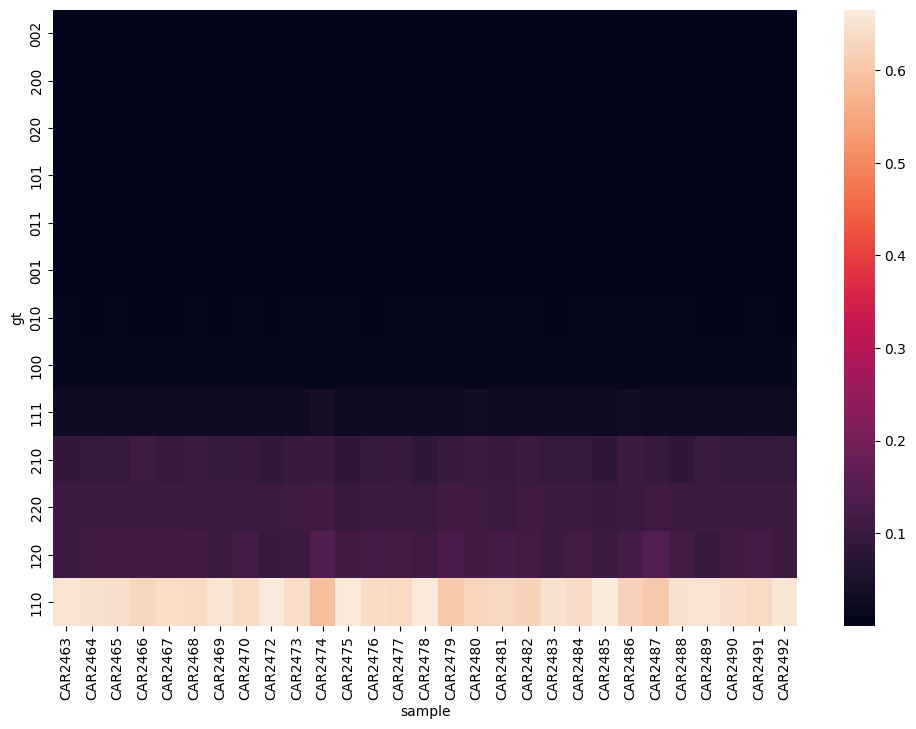

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_count.sort_values('CAR2463').drop('CAR2471', axis=1))

In [ ]:
two = ident_flt[ident_flt['sample'] == 'CAR2492']
two.apply(lambda x: (x.mother, x.father, x['diff']), axis=1).value_counts()

(1, 1, 0)       16196679
(2, 2, 0)        2643056
(1, 2, 0)        2617670
(2, 1, 0)        2290406
(1, 1, 1)         557650
(1, -1, -1)       557594
(-1, 1, -1)       502598
(-1, -1, -1)      306635
(1, 0, 0)         219830
(0, 1, 0)         180733
(2, -1, -1)        36357
(-1, 2, -1)        30360
(0, 0, 1)          25413
(-1, 0, -1)        14265
(0, -1, -1)        13653
(1, 0, 1)           5503
(0, 1, 1)           5164
(2, 0, 0)           2319
(0, 2, 0)           2061
(0, 0, 2)           1179
dtype: int64

In [ ]:
# df.head(10000).to_parquet('./data/interim/CARP_KANT.parquet.head')

In [8]:
car_cols = [x for x in df.columns if 'CAR' in x]
child_cols = car_cols[2:]
len(child_cols), child_cols

(30,
 ['CAR2463_GT',
  'CAR2464_GT',
  'CAR2465_GT',
  'CAR2466_GT',
  'CAR2467_GT',
  'CAR2468_GT',
  'CAR2469_GT',
  'CAR2470_GT',
  'CAR2471_GT',
  'CAR2472_GT',
  'CAR2473_GT',
  'CAR2474_GT',
  'CAR2475_GT',
  'CAR2476_GT',
  'CAR2477_GT',
  'CAR2478_GT',
  'CAR2479_GT',
  'CAR2480_GT',
  'CAR2481_GT',
  'CAR2482_GT',
  'CAR2483_GT',
  'CAR2484_GT',
  'CAR2485_GT',
  'CAR2486_GT',
  'CAR2487_GT',
  'CAR2488_GT',
  'CAR2489_GT',
  'CAR2490_GT',
  'CAR2491_GT',
  'CAR2492_GT'])

In [44]:
for c in tqdm.tqdm(car_cols):
    df[c] = df[c].replace('./.', '').str.split('/')\
        .apply(lambda x: {} if x[0] == '' else set(x))

  9%|▉         | 3/32 [05:39<54:44, 113.25s/it]


KeyboardInterrupt: 

In [6]:
df.head()

,CHROM,POS,REF,ALT,QUAL,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,CAR2465_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.924,1/1,NaN,NaN,1/1,1/1,...,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.671,0/1,0/1,1/1,0/1,0/0,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.540,0/1,0/0,1/1,0/1,0/0,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.760,0/0,0/1,0/0,0/0,0/1,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.530,0/1,0/0,0/0,0/0,0/1,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1


In [7]:
df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'CAR2493_F_GT', 'CAR2494_М_GT',
       'CAR2463_GT', 'CAR2464_GT', 'CAR2465_GT', 'CAR2466_GT', 'CAR2467_GT',
       'CAR2468_GT', 'CAR2469_GT', 'CAR2470_GT', 'CAR2471_GT', 'CAR2472_GT',
       'CAR2473_GT', 'CAR2474_GT', 'CAR2475_GT', 'CAR2476_GT', 'CAR2477_GT',
       'CAR2478_GT', 'CAR2479_GT', 'CAR2480_GT', 'CAR2481_GT', 'CAR2482_GT',
       'CAR2483_GT', 'CAR2484_GT', 'CAR2485_GT', 'CAR2486_GT', 'CAR2487_GT',
       'CAR2488_GT', 'CAR2489_GT', 'CAR2490_GT', 'CAR2491_GT', 'CAR2492_GT'],
      dtype='object')

In [8]:
df.shape

(28822046, 37)

In [9]:
df['CAR2493_F_GT'].isna().sum()

2516576

In [10]:
nvar = len(df)
nvar_F = nvar - df['CAR2493_F_GT'].isna().sum()
nvar_M = nvar - df['CAR2494_М_GT'].isna().sum()
nvar, nvar_F, nvar_M

(28822046, 26305470, 26289881)

In [12]:
df

,CHROM,POS,REF,ALT,QUAL,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,CAR2465_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.9240,1/1,NaN,NaN,1/1,1/1,...,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.6710,0/1,0/1,1/1,0/1,0/0,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.5400,0/1,0/0,1/1,0/1,0/0,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.7600,0/0,0/1,0/0,0/0,0/1,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.5300,0/1,0/0,0/0,0/0,0/1,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28822041,NC_056621.1,24466013,taaaa,tAaaaa,29.4556,0/0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0/0,NaN,NaN,NaN
28822042,NC_056621.1,24466018,C,A,1710.7000,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,0/1,1/1,1/1,NaN
28822043,NC_056621.1,24466071,A,G,701.4380,0/0,0/1,0/0,1/1,0/0,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,0/1,0/0
28822044,NC_056621.1,24466075,C,T,700.1770,0/0,0/1,0/0,1/1,0/0,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,1/1,0/0


In [11]:
(df['CAR2493_F_GT'] == df['CAR2494_М_GT']).sum()

12260455

In [13]:
(df['CAR2493_F_GT'] == df['CAR2464_GT']).sum()

16413790

In [14]:
(df['CAR2493_F_GT'] == df['CAR2483_GT']).sum()

16446845

In [15]:
data_isec = []
for ch in tqdm.tqdm(child_cols):
    ncommon_M = (df['CAR2494_М_GT'] == df[ch]).sum()
    ncommon_F = (df['CAR2493_F_GT'] == df[ch]).sum()
    private2M = nvar_M - ncommon_M
    private2F = nvar_F - ncommon_F
    
    nvar_ch = nvar - df[ch].isna().sum()

    private2chF = nvar_ch - ncommon_F
    private2chM = nvar_ch - ncommon_M

    data_isec.append((ch, ncommon_M, private2M, private2chM, ncommon_F, private2F, private2chF))
df_isec = pd.DataFrame(data_isec, columns=('ch', 'ncommon_M', 'private2M', 'private2chM', 'ncommon_F', 'private2F', 'private2chF'))

100%|██████████| 30/30 [01:52<00:00,  3.73s/it]


In [17]:
df_isec['iouM'] = df_isec['ncommon_M'] / (df_isec['ncommon_M'] + df_isec['private2M'] + df_isec['private2chM'])
df_isec['iouF'] = df_isec['ncommon_F'] / (df_isec['ncommon_F'] + df_isec['private2F'] + df_isec['private2chF'])


Groups:
- [63, 72] - control
- [73, 82] - NEM/SHOK
- [83, 92] - NEM

In [21]:
sample2gr = dict()
for i in range(63, 73):
    sample2gr[f'CAR24{i}_GT'] = 'Ctrl'
for i in range(73, 83):
    sample2gr[f'CAR24{i}_GT'] = 'NEM/SHOK'
for i in range(83, 93):
    sample2gr[f'CAR24{i}_GT'] = 'NEM'

In [23]:
df_isec['Group'] = df_isec['ch'].map(sample2gr)

In [24]:
df_isec

,ch,ncommon_M,private2M,private2chM,ncommon_F,private2F,private2chF,iouM,iouF,Group
0,CAR2463_GT,15861643,10428238,10274012,16279957,10025513,9855698,0.433806,0.450206,Ctrl
1,CAR2464_GT,16004171,10285710,10185242,16413790,9891680,9775623,0.438769,0.454914,Ctrl
2,CAR2465_GT,15878840,10411041,10269173,16174325,10131145,9973688,0.434334,0.445830,Ctrl
3,CAR2466_GT,15482932,10806949,10781137,16728693,9576777,9535376,0.417656,0.466749,Ctrl
4,CAR2467_GT,15762513,10527368,10450606,16470997,9834473,9742122,0.429023,0.456924,Ctrl
5,CAR2468_GT,15620105,10669776,10576420,16396207,9909263,9800318,0.423696,0.454116,Ctrl
6,CAR2469_GT,15638148,10651733,10457880,16403480,9901990,9692548,0.425554,0.455677,Ctrl
7,CAR2470_GT,15835269,10454612,10359242,16038315,10267155,10156196,0.432078,0.439868,Ctrl
8,CAR2471_GT,12657387,13632494,13420751,14502675,11802795,11575463,0.318741,0.382849,Ctrl
9,CAR2472_GT,15742553,10547328,10311003,16397320,9908150,9656236,0.430114,0.455966,Ctrl


<Axes: xlabel='Group', ylabel='private2chM'>

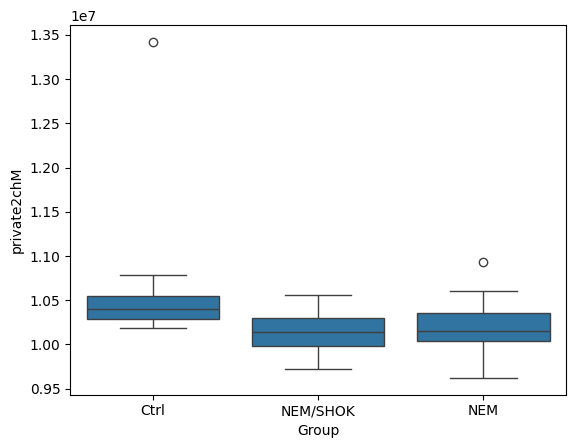

In [55]:
sns.boxplot(df_isec, y='private2chM', x='Group')

In [29]:
import pingouin as pg

pg.pairwise_tests(data=df_isec[df_isec.ch != 'CAR2471_GT'], 
                  dv='iouM', between='Group', parametric=False, padjust='bonf')

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Group,Ctrl,NEM,False,False,29.0,two-sided,0.205667,0.617002,bonf,-0.523503
1,Group,Ctrl,NEM/SHOK,False,False,24.0,two-sided,0.094166,0.282499,bonf,-0.829268
2,Group,NEM,NEM/SHOK,False,False,47.0,two-sided,0.850107,1.000000,bonf,-0.037968


In [46]:
pg.pairwise_tests(data=df_isec[df_isec.ch != 'CAR2471_GT'], 
                  dv='iouF', between='Group', parametric=False, padjust='bonf')

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Group,Ctrl,NEM,False,False,59.0,two-sided,0.270344,0.811032,bonf,0.446002
1,Group,Ctrl,NEM/SHOK,False,False,71.0,two-sided,0.037336,0.112009,bonf,0.857256
2,Group,NEM,NEM/SHOK,False,False,59.0,two-sided,0.520523,1.000000,bonf,0.307352


In [58]:
pg.kruskal(data=df_isec[df_isec.ch != 'CAR2471_GT'], dv='private2chM', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,2,5.690728,0.058113


In [44]:
pg.kruskal(data=df_isec[df_isec.ch != 'CAR2471_GT'], dv='iouM', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,2,3.12567,0.209541


In [25]:
df_isec.to_csv('./data/df_isec.tsv', sep='\t', index=False)

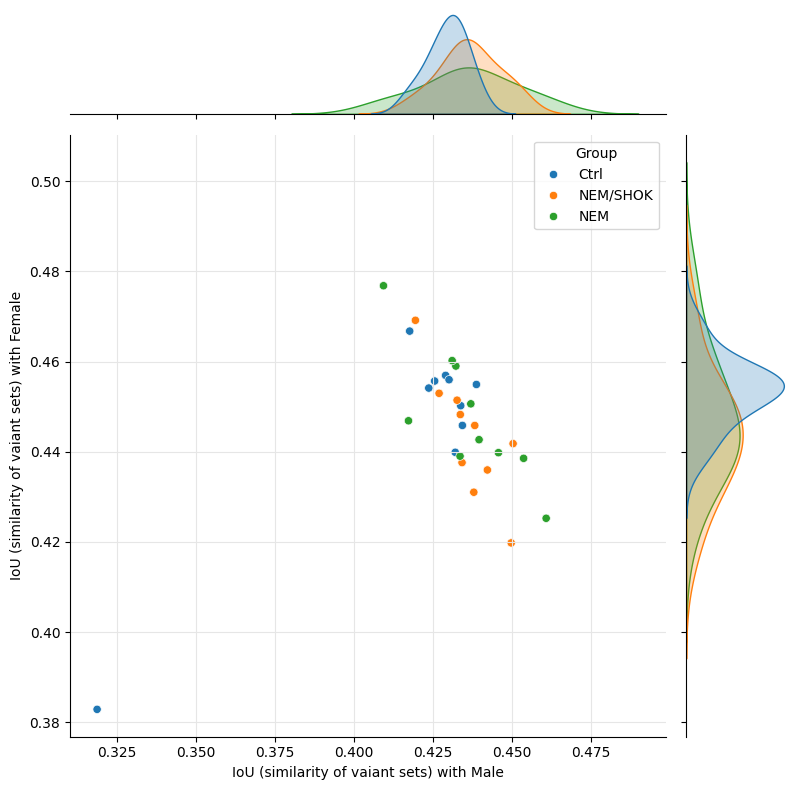

In [26]:
# plt.figure(figsize=(12, 8))
g = sns.jointplot(data=df_isec[df_isec.ch != 'CAR2471_GT'], x='iouM', y='iouF', hue='Group', kind="scatter", height=8, ratio=5)
sns.scatterplot(data=df_isec, x='iouM', y='iouF', hue='Group', legend=False)

plt.xlabel('IoU (similarity of vaiant sets) with Male')
plt.ylabel('IoU (similarity of vaiant sets) with Female')
plt.grid(color='0.9')
plt.savefig('./figures/IoU_children.pdf')
plt.show()